# วิเคราะห์การถดถอยเชิงเส้นแบบหลายตัวแปร

In [1]:
from IPython.display import Math

In [9]:
Math(r'J=SSE=\sum_{i} (z_{(i)}-h_{(i)})^2 ')

<IPython.core.display.Math object>

In [11]:
Math(r'h_{(i)}=\sum_{j} w_{j}x_{j(i)}+b=w_{1}x_{1(i)}+w_{2}x_{2(i)}+...+w_{n}x_{n(i)}+b')

<IPython.core.display.Math object>

In [12]:
Math(r' \frac{\partial \mathbf{J}}{\partial \mathbf{w_{j}}}=2\sum_{i} (z_{(i)}-h_{(i)})x_{j(i)} ')

<IPython.core.display.Math object>

In [4]:
Math(r' \frac{\partial \mathbf{J}}{\partial \mathbf{b}}=2\sum_{i} (z_{(i)}-h_{(i)}) ')

<IPython.core.display.Math object>

In [15]:
Math(r' \Delta w_{j} = -\eta\frac{\partial \mathbf{J}}{\partial \mathbf{w_{j}}}=2\eta\sum_{i} (h_{(i)}-z_{(i)})x_{j(i)} ')

<IPython.core.display.Math object>

In [14]:
Math(r' \Delta b = -\eta\frac{\partial \mathbf{J}}{\partial \mathbf{b}}=2\eta\sum_{i} (h_{(i)}-z_{(i)}) ')

<IPython.core.display.Math object>

n เป็นจำนวนมิติ (จำนวนตัวแปรต้น) ของปัญหา

j เป็นเลขลำดับของตัวแปรต้น แต่ละตัวแปรต้นจะมีค่าน้ำหนักของตัวเอง ซึ่งเป็นตัวบอกว่าตัวแปรต้นนั้นมีความสำคัญ มีอิทธิพลต่อผลลัพธ์แค่ไหน

<b>ตัวอย่าง</b> โจทย์ปัญหาในสองมิติ

สมมุติว่าเล่นเกมส์เลี้ยงอสูรเพื่อนำไปต่อสู้กัน โดยพลังโจมตีของอสูรนั้นจะขึ้นกับอาหารที่กิน

ผู้เล่นคนหนึ่งสามารถเลี้ยงอสูรได้หลายตัว โดยให้อาหารในปริมาณต่างๆกันแล้วดูว่าสุดท้ายแล้วอสูรมีพลังโจมตีเท่าไหร่

ให้อาหารที่เป็นแปรต้นนั้น มี 2 ชนิด ได้แก่ ผลไม้และผัก

In [16]:
Math(r'h=x_{1}w_{1}+x_{2}w_{2}+b')

<IPython.core.display.Math object>

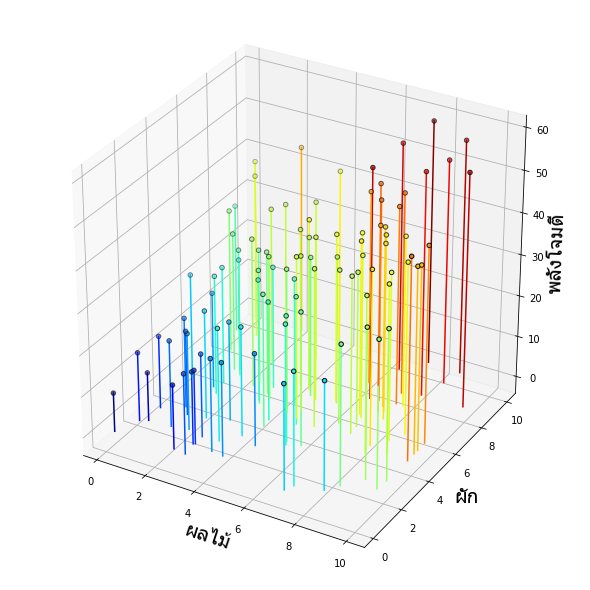

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


phonlamai = np.random.uniform(0,10,100) # ปริมาณผลไม้
phak = np.random.uniform(0,10,100) # ปริมาณผัก
chomti = 10+phonlamai*2+phak*3+np.random.randn(100)*3 # คำนวณพลังโจมตี

plt.figure(figsize=[8,8])
ax = plt.axes([0,0,1,1],projection='3d')
ax.set_xlabel(u'ผลไม้',fontname='Tahoma',fontsize=20)
ax.set_ylabel(u'ผัก',fontname='Tahoma',fontsize=20)
ax.set_zlabel(u'พลังโจมตี',fontname='Tahoma',fontsize=20)
# กำหนดสีของเส้นและจุดตามค่า
def si(x):
    x = (x-chomti.min())/(chomti.max()-chomti.min())
    return plt.get_cmap('jet')(x)
# วาดเส้นลากจากพื้นให้กับทุกจุด
for i in range(100):
    ax.plot([phonlamai[i],phonlamai[i]],[phak[i],phak[i]],[0,chomti[i]],color=si(chomti[i]))
# วาดจุด
ax.scatter(phonlamai,phak,chomti,c=si(chomti),edgecolor='k')
plt.show()

แกน x และ y คือปริมาณผลไม้และผักที่ให้อสูรทาน แกน z เป็นพลังโจมตี (ให้อาหารมาก พลังโจมตีก็มาก)

จากโค้ดนี้จะเห็นได้ว่าคำตอบคือ w1=2, w2=3, b=10

วิธีการแก้ปัญหาเราจะนำโค้ดจากตอนที่แล้วซึ่งใช้วิธีการเคลื่อนลงตามความชันในหนึ่งมิติมาแก้เล็กน้อยให้ใช้สำหรับปัญหาสองมิติได้

เขียนได้ดังนี้

In [18]:
eta = 0.0001
n_thamsam = 10000
d_yut = 1e-7
w1,w2,b = 0,0,0
h = w1*phonlamai+w2*phak+b
for i in range(n_thamsam):
    dw1 = (2*(chomti-h)*phonlamai).sum()*eta
    dw2 = (2*(chomti-h)*phak).sum()*eta
    db = 2*(chomti-h).sum()*eta
    w1 += dw1
    w2 += dw2
    b += db
    h = w1*phonlamai+w2*phak+b
    if(abs(dw1)and abs(dw2)and abs(db)<d_yut):
        break

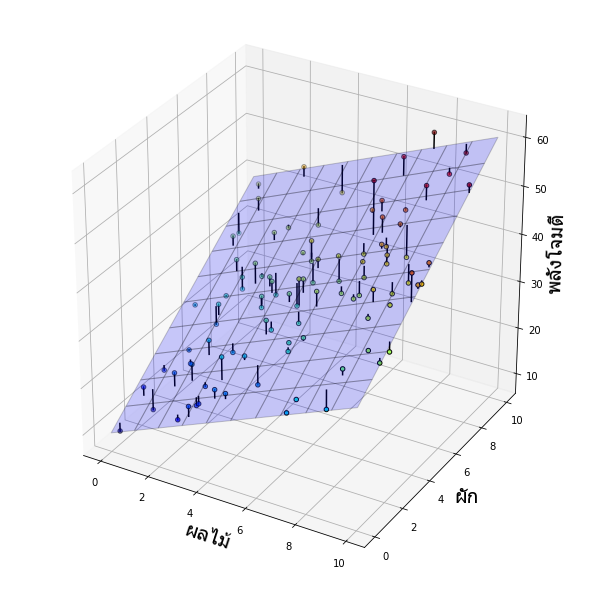

9.678673279238804 2.1631845364704785 2.9404671965490903


In [19]:
plt.figure(figsize=[8,8])
ax = plt.axes([0,0,1,1],projection='3d')
ax.set_xlabel(u'ผลไม้',fontname='Tahoma',fontsize=20)
ax.set_ylabel(u'ผัก',fontname='Tahoma',fontsize=20)
ax.set_zlabel(u'พลังโจมตี',fontname='Tahoma',fontsize=20)
# สร้างโครงข่ายพื้นผิวค่าทำนาย
mx,my = np.meshgrid(np.linspace(0,10,11),np.linspace(0,10,11))
# คำนวณค่าทำนายบนพื้นผิวจากค่าน้ำหนักที่ได้
mz = b+mx*w1+my*w2
# วาดพื้นผิว
ax.plot_surface(mx,my,mz,rstride=1,cstride=1,alpha=0.2,color='b',edgecolor='k')
h = phonlamai*w1+phak*w2+b
# วาดเส้นเชื่อมระหว่างจุดของค่าจริงกับระนาบที่ทำนาย
for i in range(100):
    ax.plot([phonlamai[i],phonlamai[i]],[phak[i],phak[i]],[h[i],chomti[i]],'k')
# จุดของค่าจริง
ax.scatter(phonlamai,phak,chomti,c=chomti,edgecolor='k',cmap='jet')
plt.show()
print(b,w1,w2)
# (9.964693266998049, 2.1468002594406337, 2.8872801897811629)

ที่เปลี่ยนไปจากเดิมมีแค่แทนที่จะเป็น dw ตัวเดียวก็ใช้เป็น dw1 และ dw2 เวลาที่คำนวณอะไรต่างๆก็ต้องทำทั้ง 2 อัน

เท่านี้ค่าน้ำหนัก w1, w2 และ b ก็ควรจะเป็นค่าตามที่ต้องการแล้ว

จากกราฟผลลัพธ์ การวาดระนาบของค่าที่ทำนายจากค่าน้ำหนักและไบแอสที่ได้ในท้ายสุด เราจะวาดจุดของค่าคำตอบจริงและลากเส้นค่าส่วนต่างเพื่อเปรียบเทียบให้เห็นความคลาดเคลื่อนด้วย

In [45]:
eta = 0.0001
n_sungsut = 10000
d_yut = 1e-7
ahan = np.stack([phonlamai,phak],1)
w = np.zeros(ahan.shape[1]+1)
dw = np.zeros(ahan.shape[1]+1)
h = np.dot(ahan,w[1:])+w[0]

for i in range(n_sungsut):
    dw[1:] = 2*np.dot(chomti-h,ahan)*eta # d(w_1)+d(w_2) # dot มันจะคูณแล้วบวกให้เลย ไม่ต้อง sum อีก
    dw[0] = 2*(chomti-h).sum()*eta # db
    w += dw
    h = np.dot(ahan,w[1:])+w[0] 
    if(np.all(abs(dw)<d_yut)):
        break # หยุดเฉพาะเมื่อค่าน้ำหนักทุกตัวเปลี่ยนแปลงน้อยกว่า d_yut

In [46]:
w

array([9.67867328, 2.16318454, 2.9404672 ])

In [47]:
 dw[1:]

array([-8.09510569e-09, -9.39833740e-09])

In [50]:
abs(dw)

array([9.98312571e-08, 8.09510569e-09, 9.39833740e-09])

In [49]:
dw

array([ 9.98312571e-08, -8.09510569e-09, -9.39833740e-09])